In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
adata=sc.read_h5ad('woundintegrate.h5ad')

In [ ]:
adata_fib=adata[adata.obs['leiden'].isin(['1'])]

In [ ]:
batches = adata_fib.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_fib[adata_fib.obs['sample'] == batch,]  
#subset the individual dataset to the same variable genes as in MNN-correct.
alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
adata_fibs = list(alldata2.values())

# run scanorama.integrate
scanorama.integrate_scanpy(adata_fibs, dimred = 50)

In [ ]:
adata_fibs[0].obsm['X_scanorama'].shape

In [13]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adata_fibs]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object
adata_fib.obsm["Scanorama"] = all_s

(4317, 50)


In [14]:
#umap
sc.pp.neighbors(adata_fib, n_pcs=30, use_rep = "Scanorama")
sc.tl.umap(adata_fib)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


In [15]:
sc.tl.leiden(adata_fib,resolution=0.3)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [21]:
dictld = {"0":"0","1":"2","2":"1","3":"4","4":"3"}
nld=[]

In [22]:
for i in adata_fib.obs['leiden']:
    nld.append(dictld.get(i))

In [23]:
adata_fib.obs['newleiden'] = nld

In [4]:
adata_fib = sc.read_h5ad('fibroblasts.h5ad')

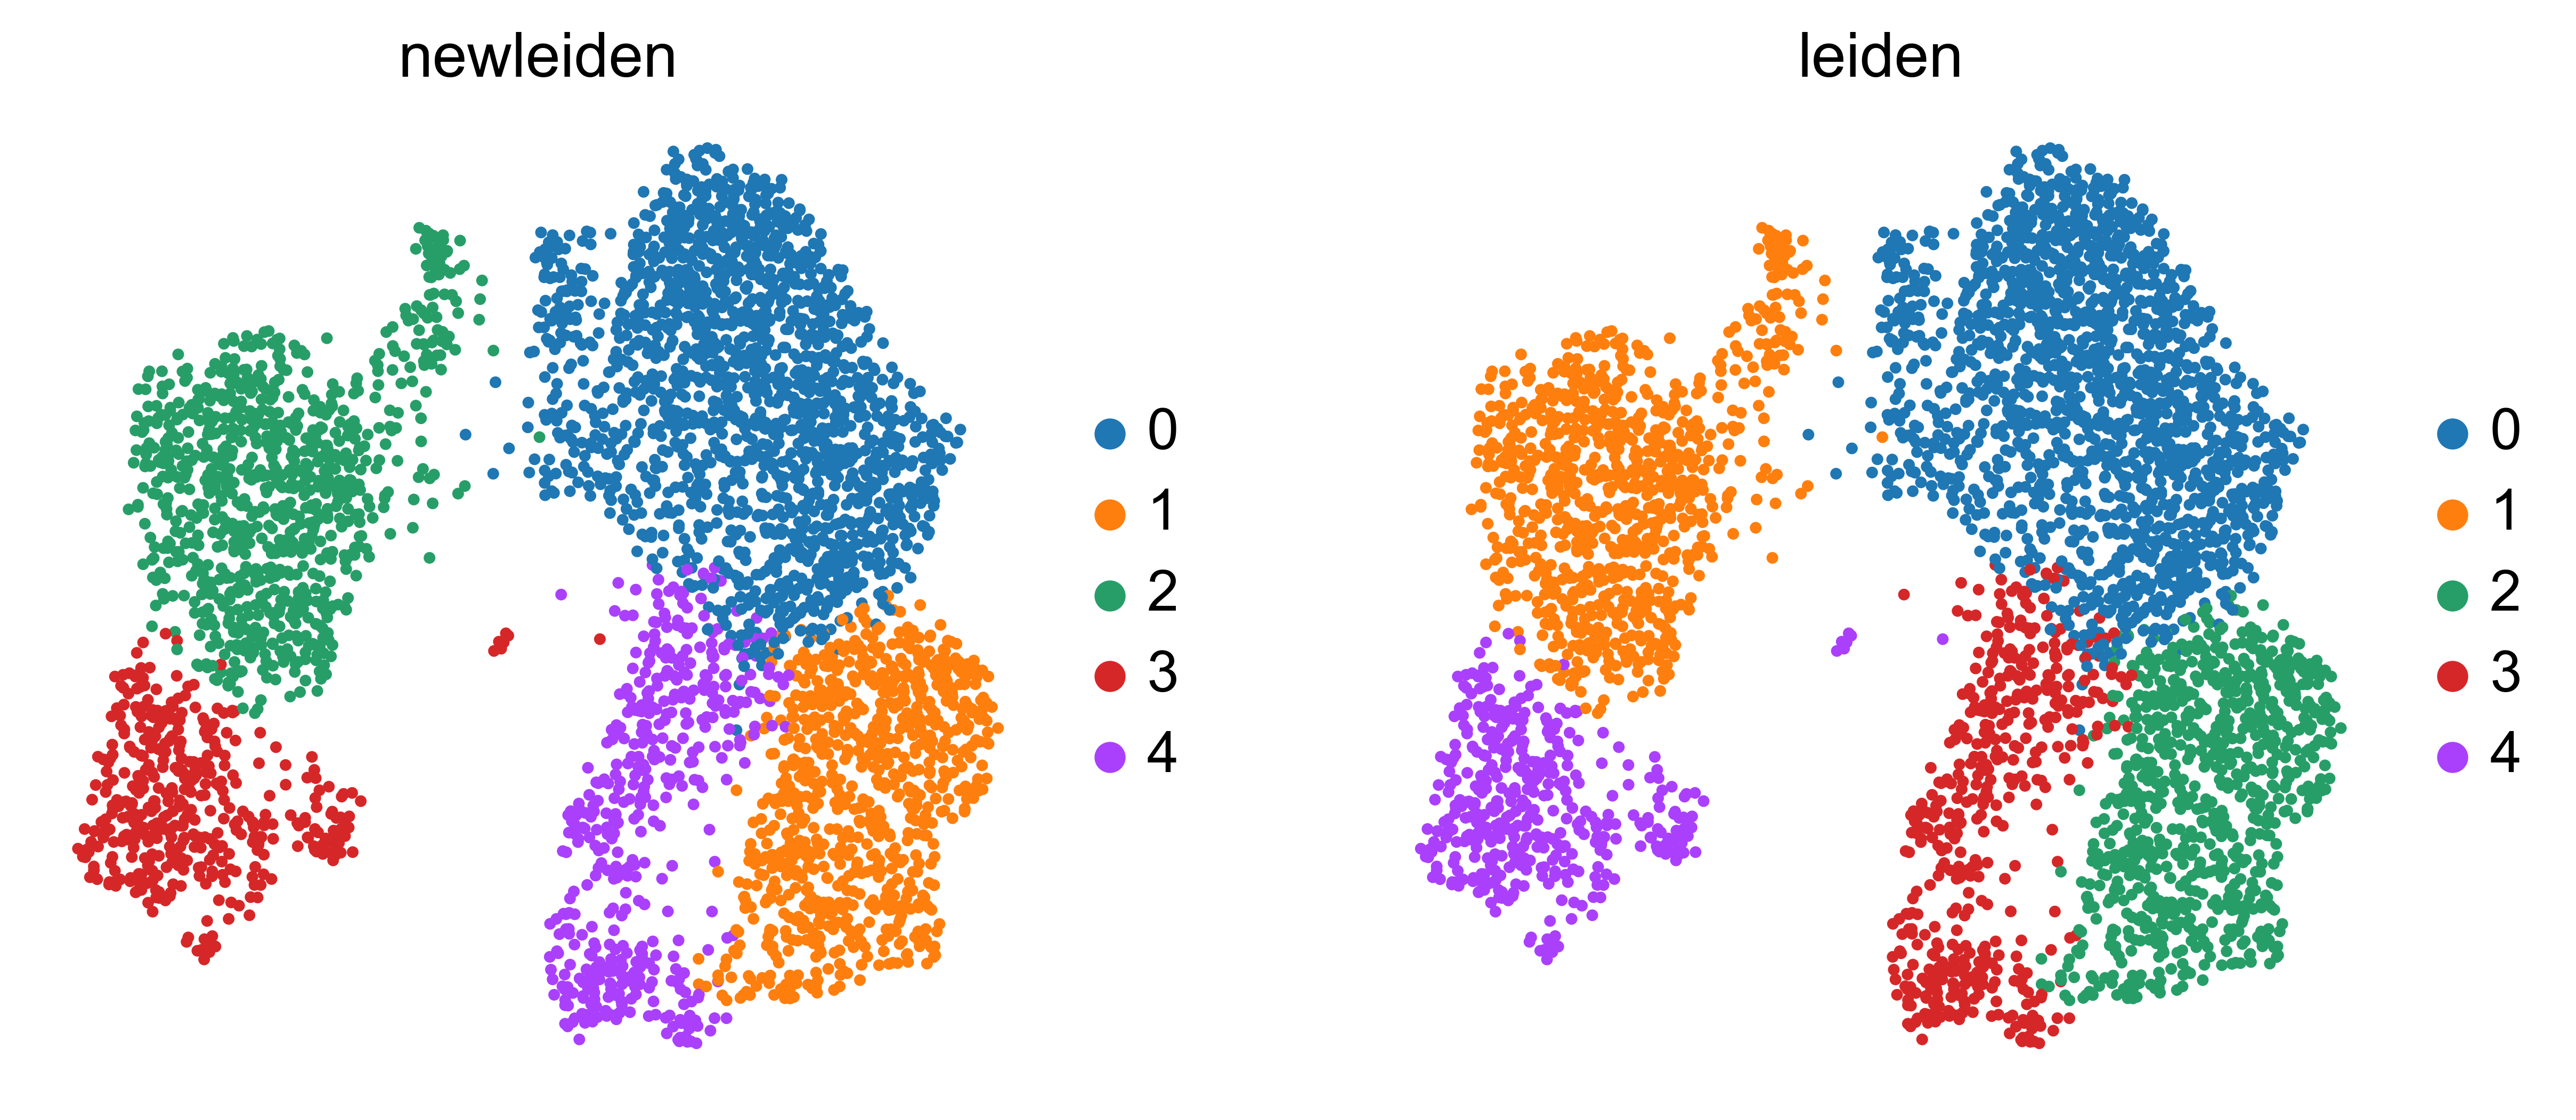

In [5]:
sc.pl.umap(adata_fib,color=['newleiden','leiden'],frameon=False)

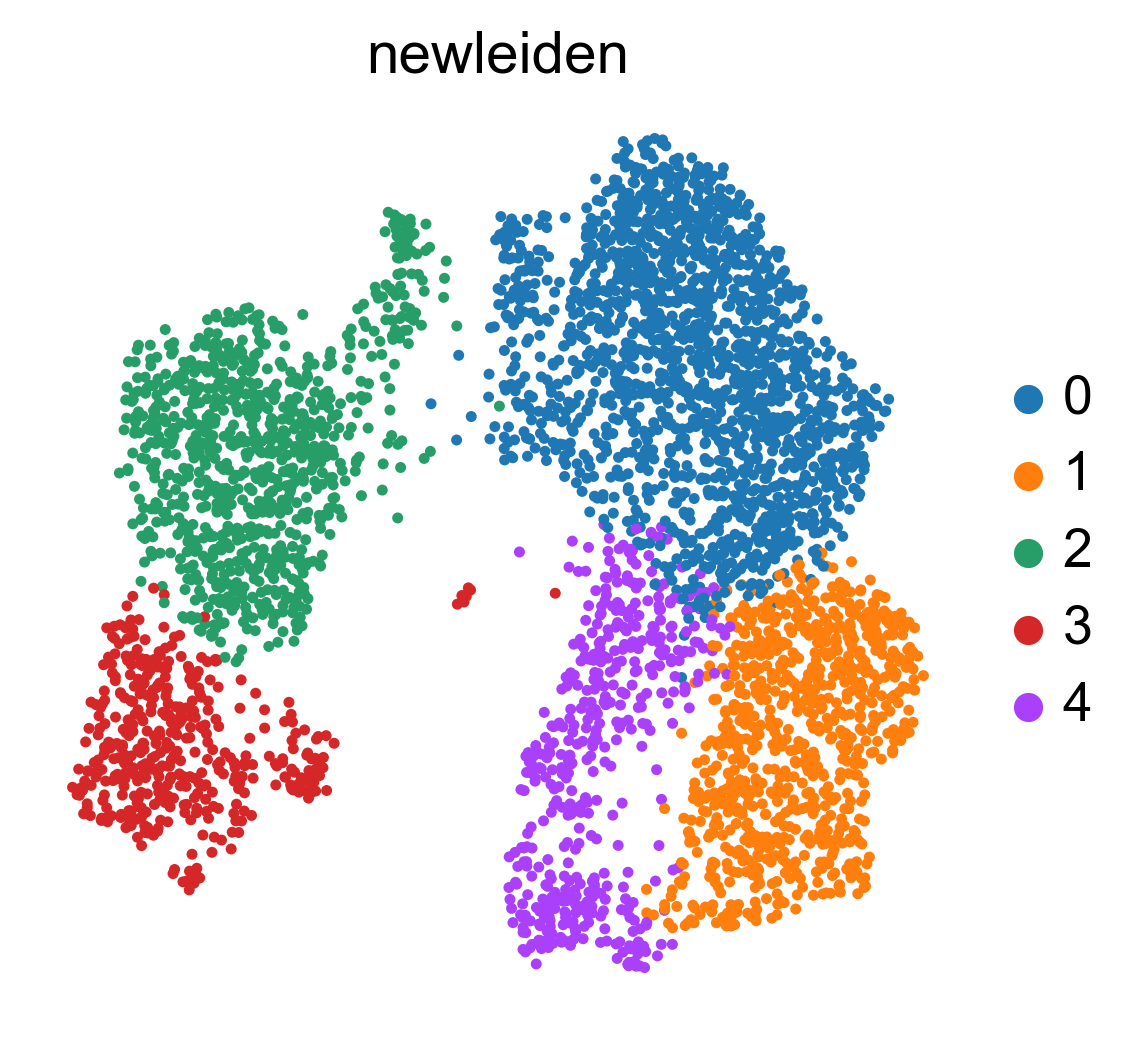

In [30]:
sc.pl.umap(adata_fib,color='newleiden',frameon=False)

In [6]:
sc.tl.diffmap(adata_fib)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9846342  0.9762392  0.96443725 0.95715165 0.9481265
     0.93474925 0.9177595  0.90203357 0.90023124 0.8960914  0.89240515
     0.8869833  0.8845459  0.8780682 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


In [7]:
sc.pp.neighbors(adata_fib, n_neighbors=5, use_rep='X_diffmap')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [8]:
sc.tl.draw_graph(adata_fib)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:36)


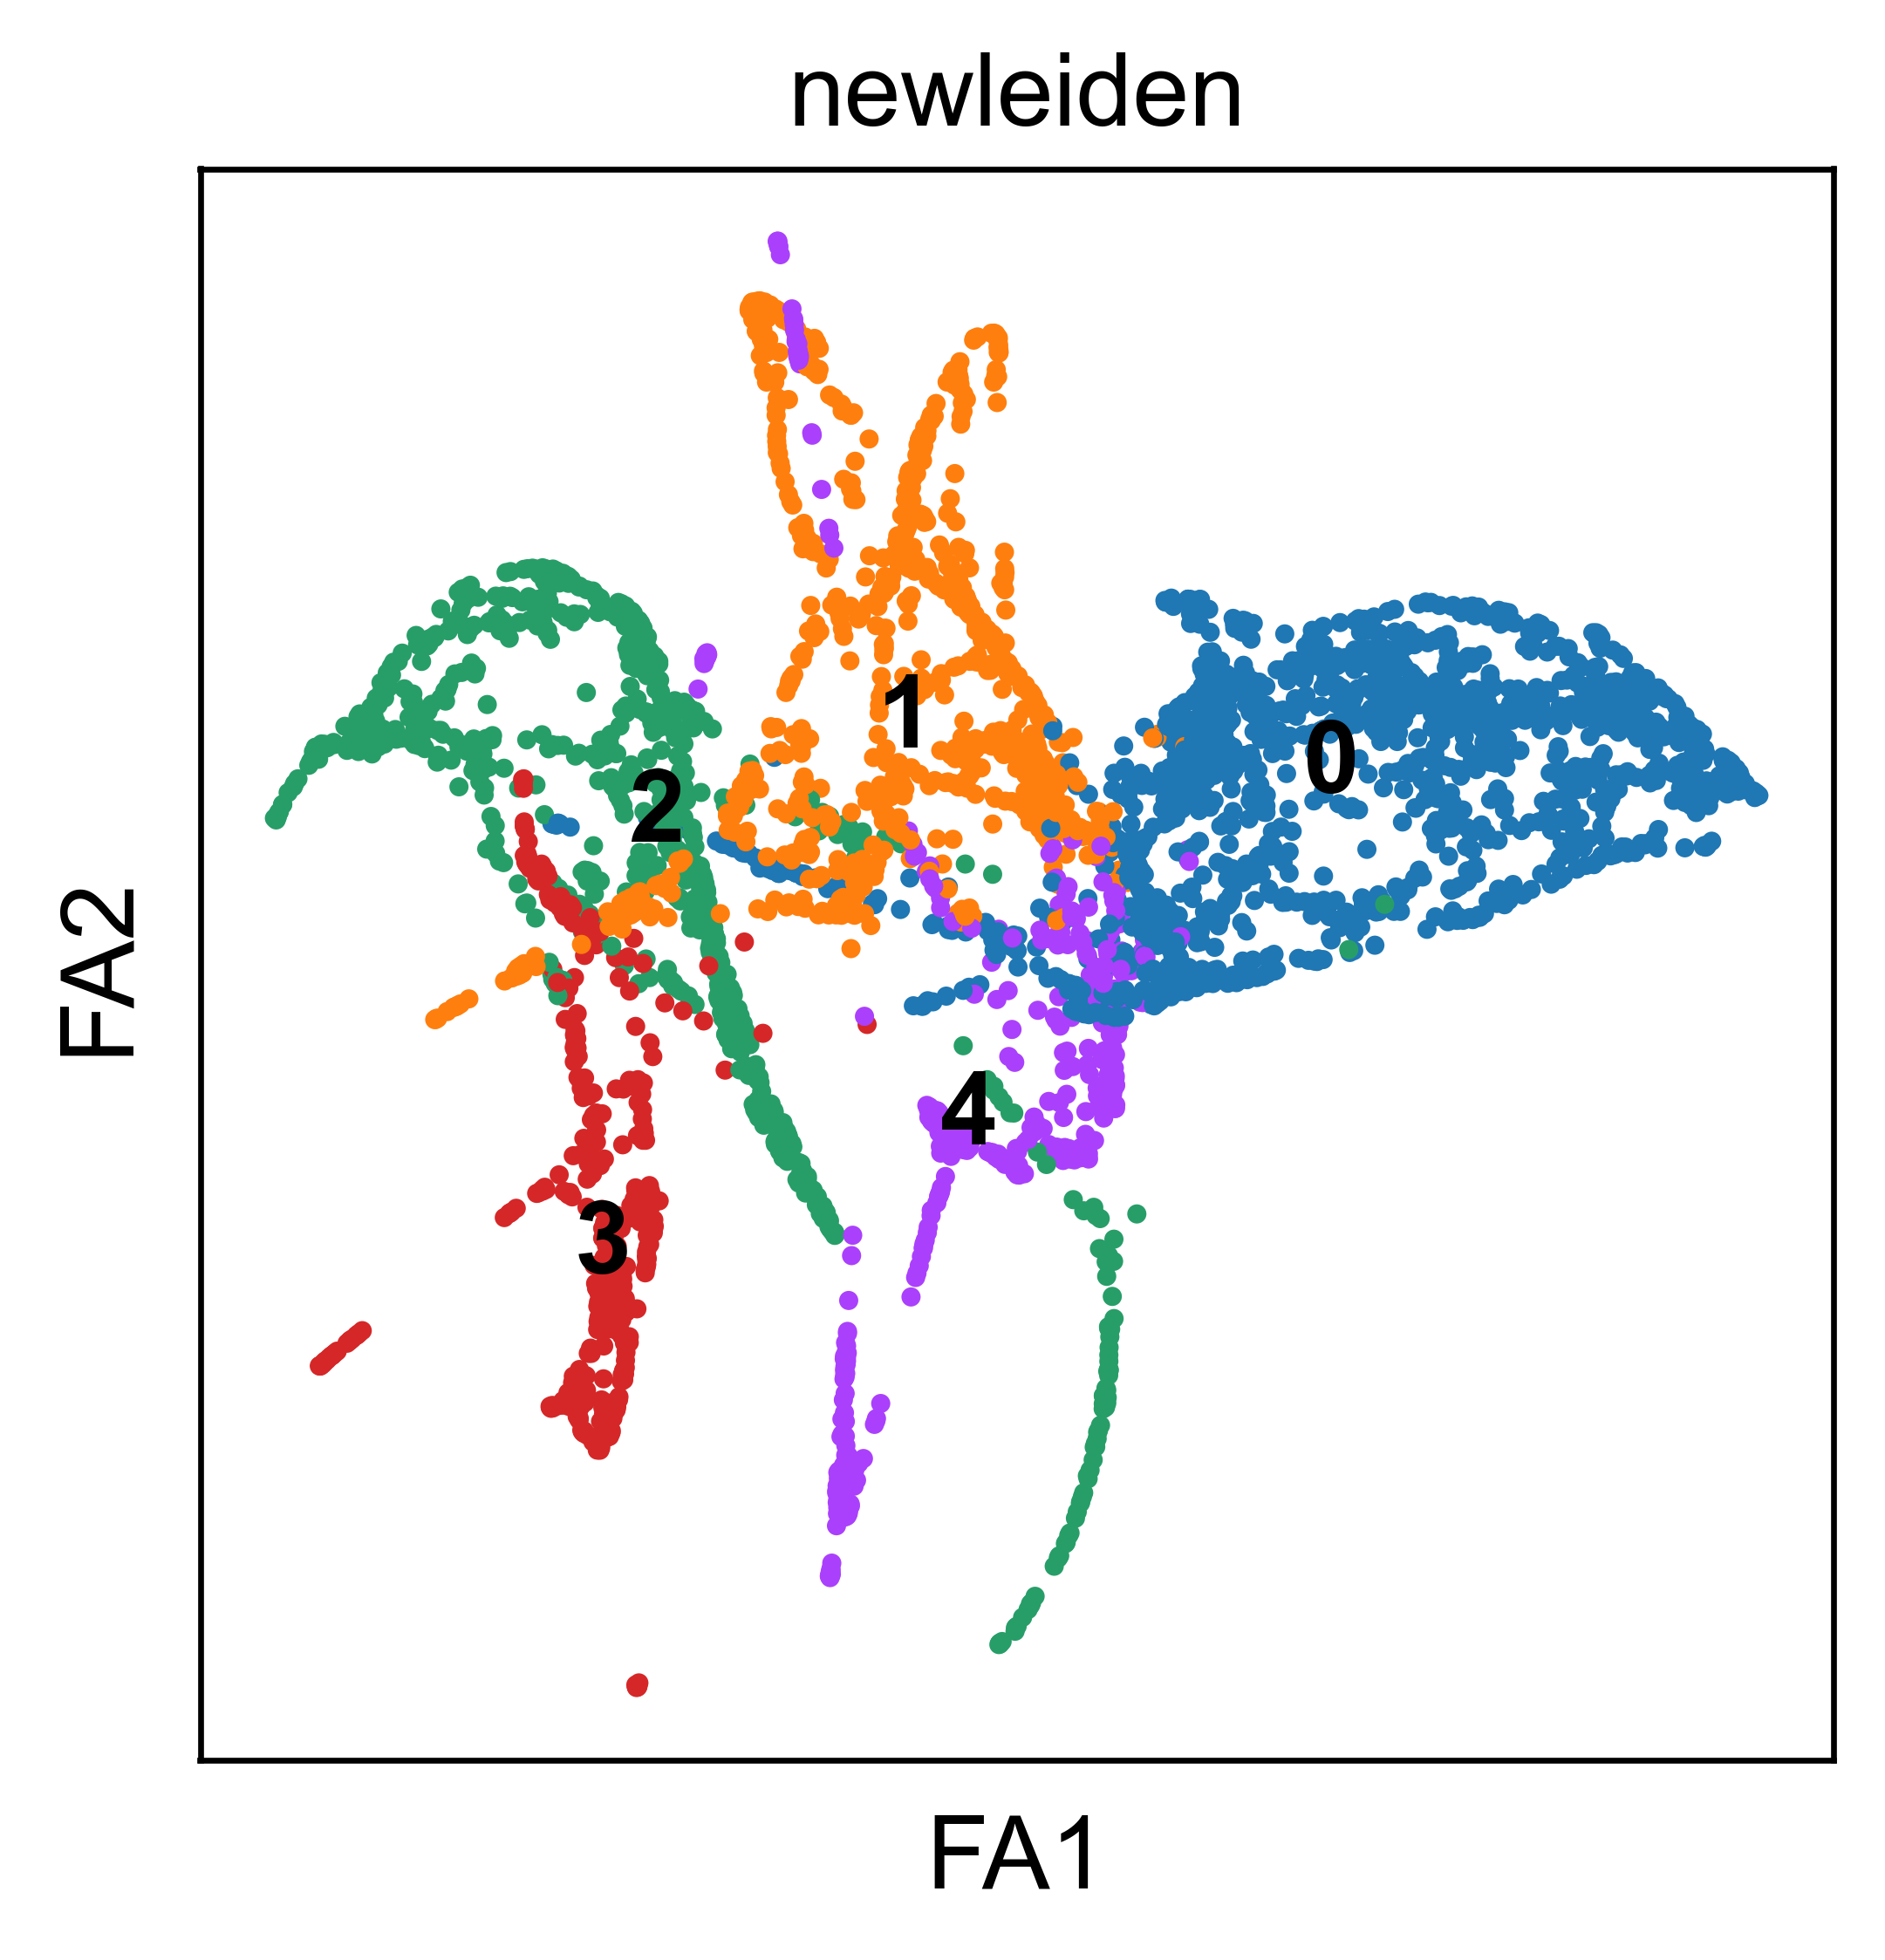

In [9]:
sc.pl.draw_graph(adata_fib, color='newleiden', legend_loc='on data')

In [10]:
sc.tl.paga(adata_fib,groups='newleiden')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


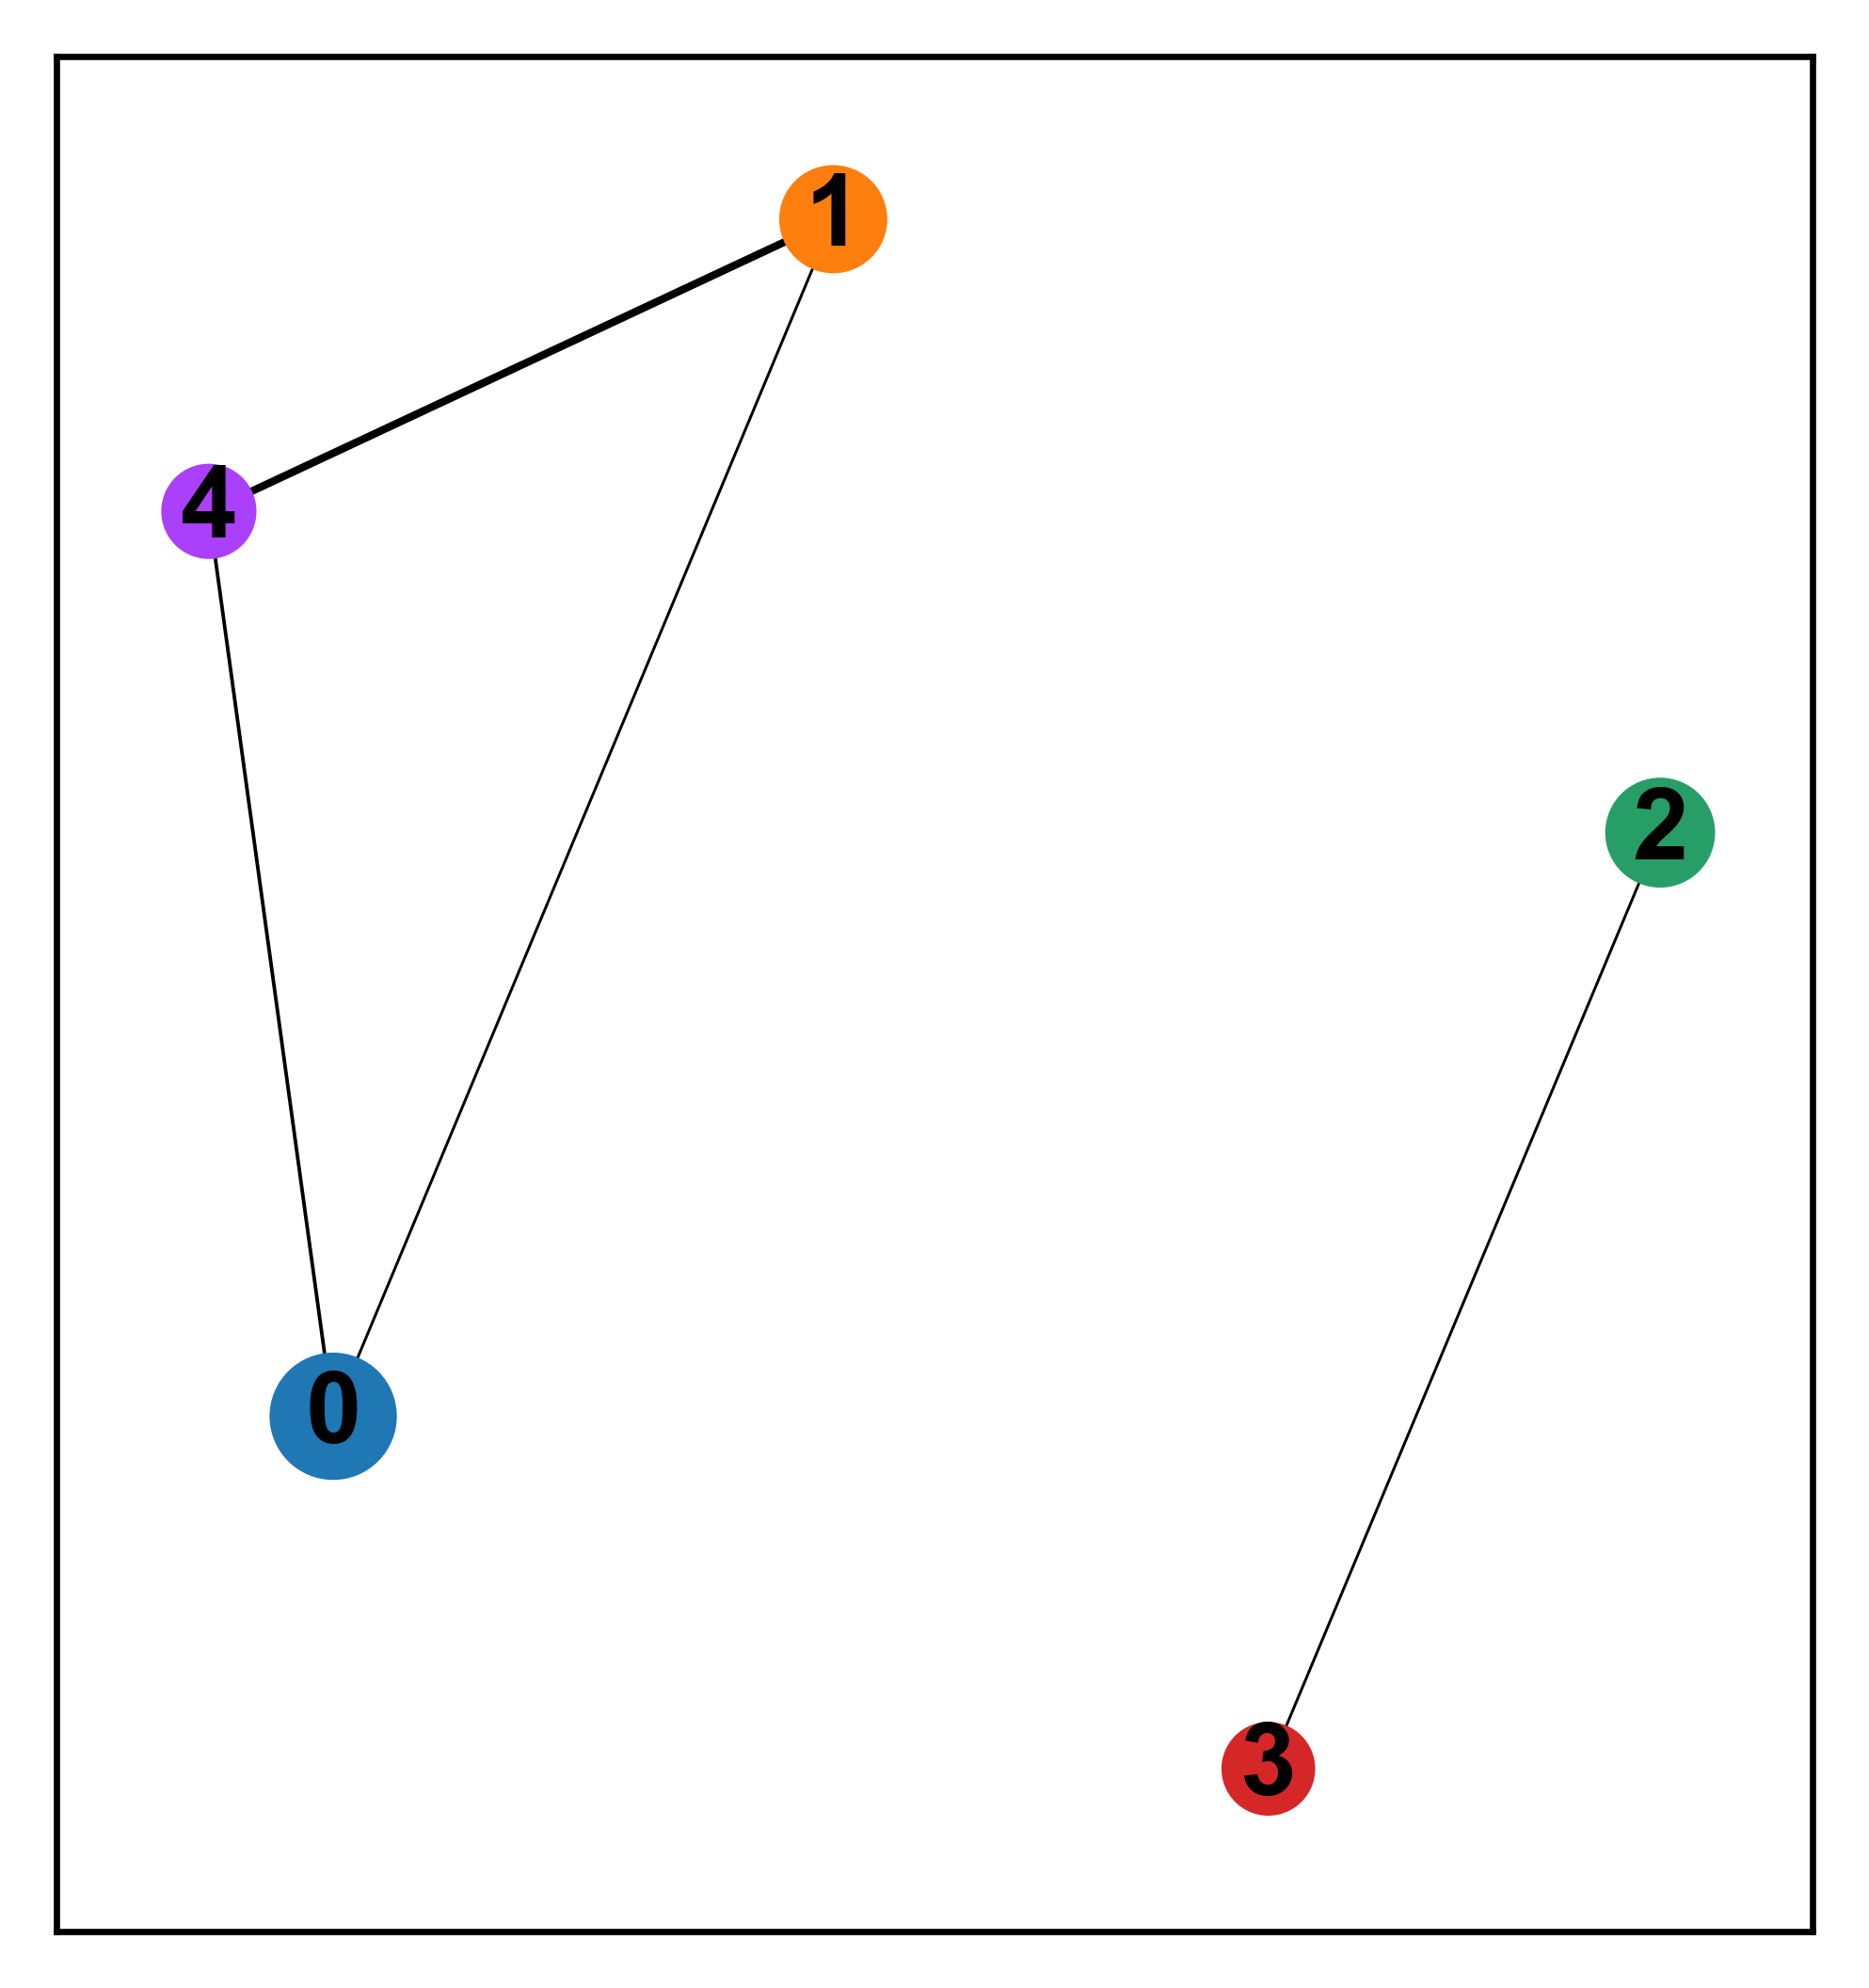

In [11]:
sc.pl.paga(adata_fib, color=['newleiden'])

In [12]:
sc.tl.draw_graph(adata_fib, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:32)


In [23]:
adata_fib.uns['iroot'] = np.flatnonzero(adata_fib.obs['newleiden']  == '1')[0]

In [24]:
sc.tl.dpt(adata_fib)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


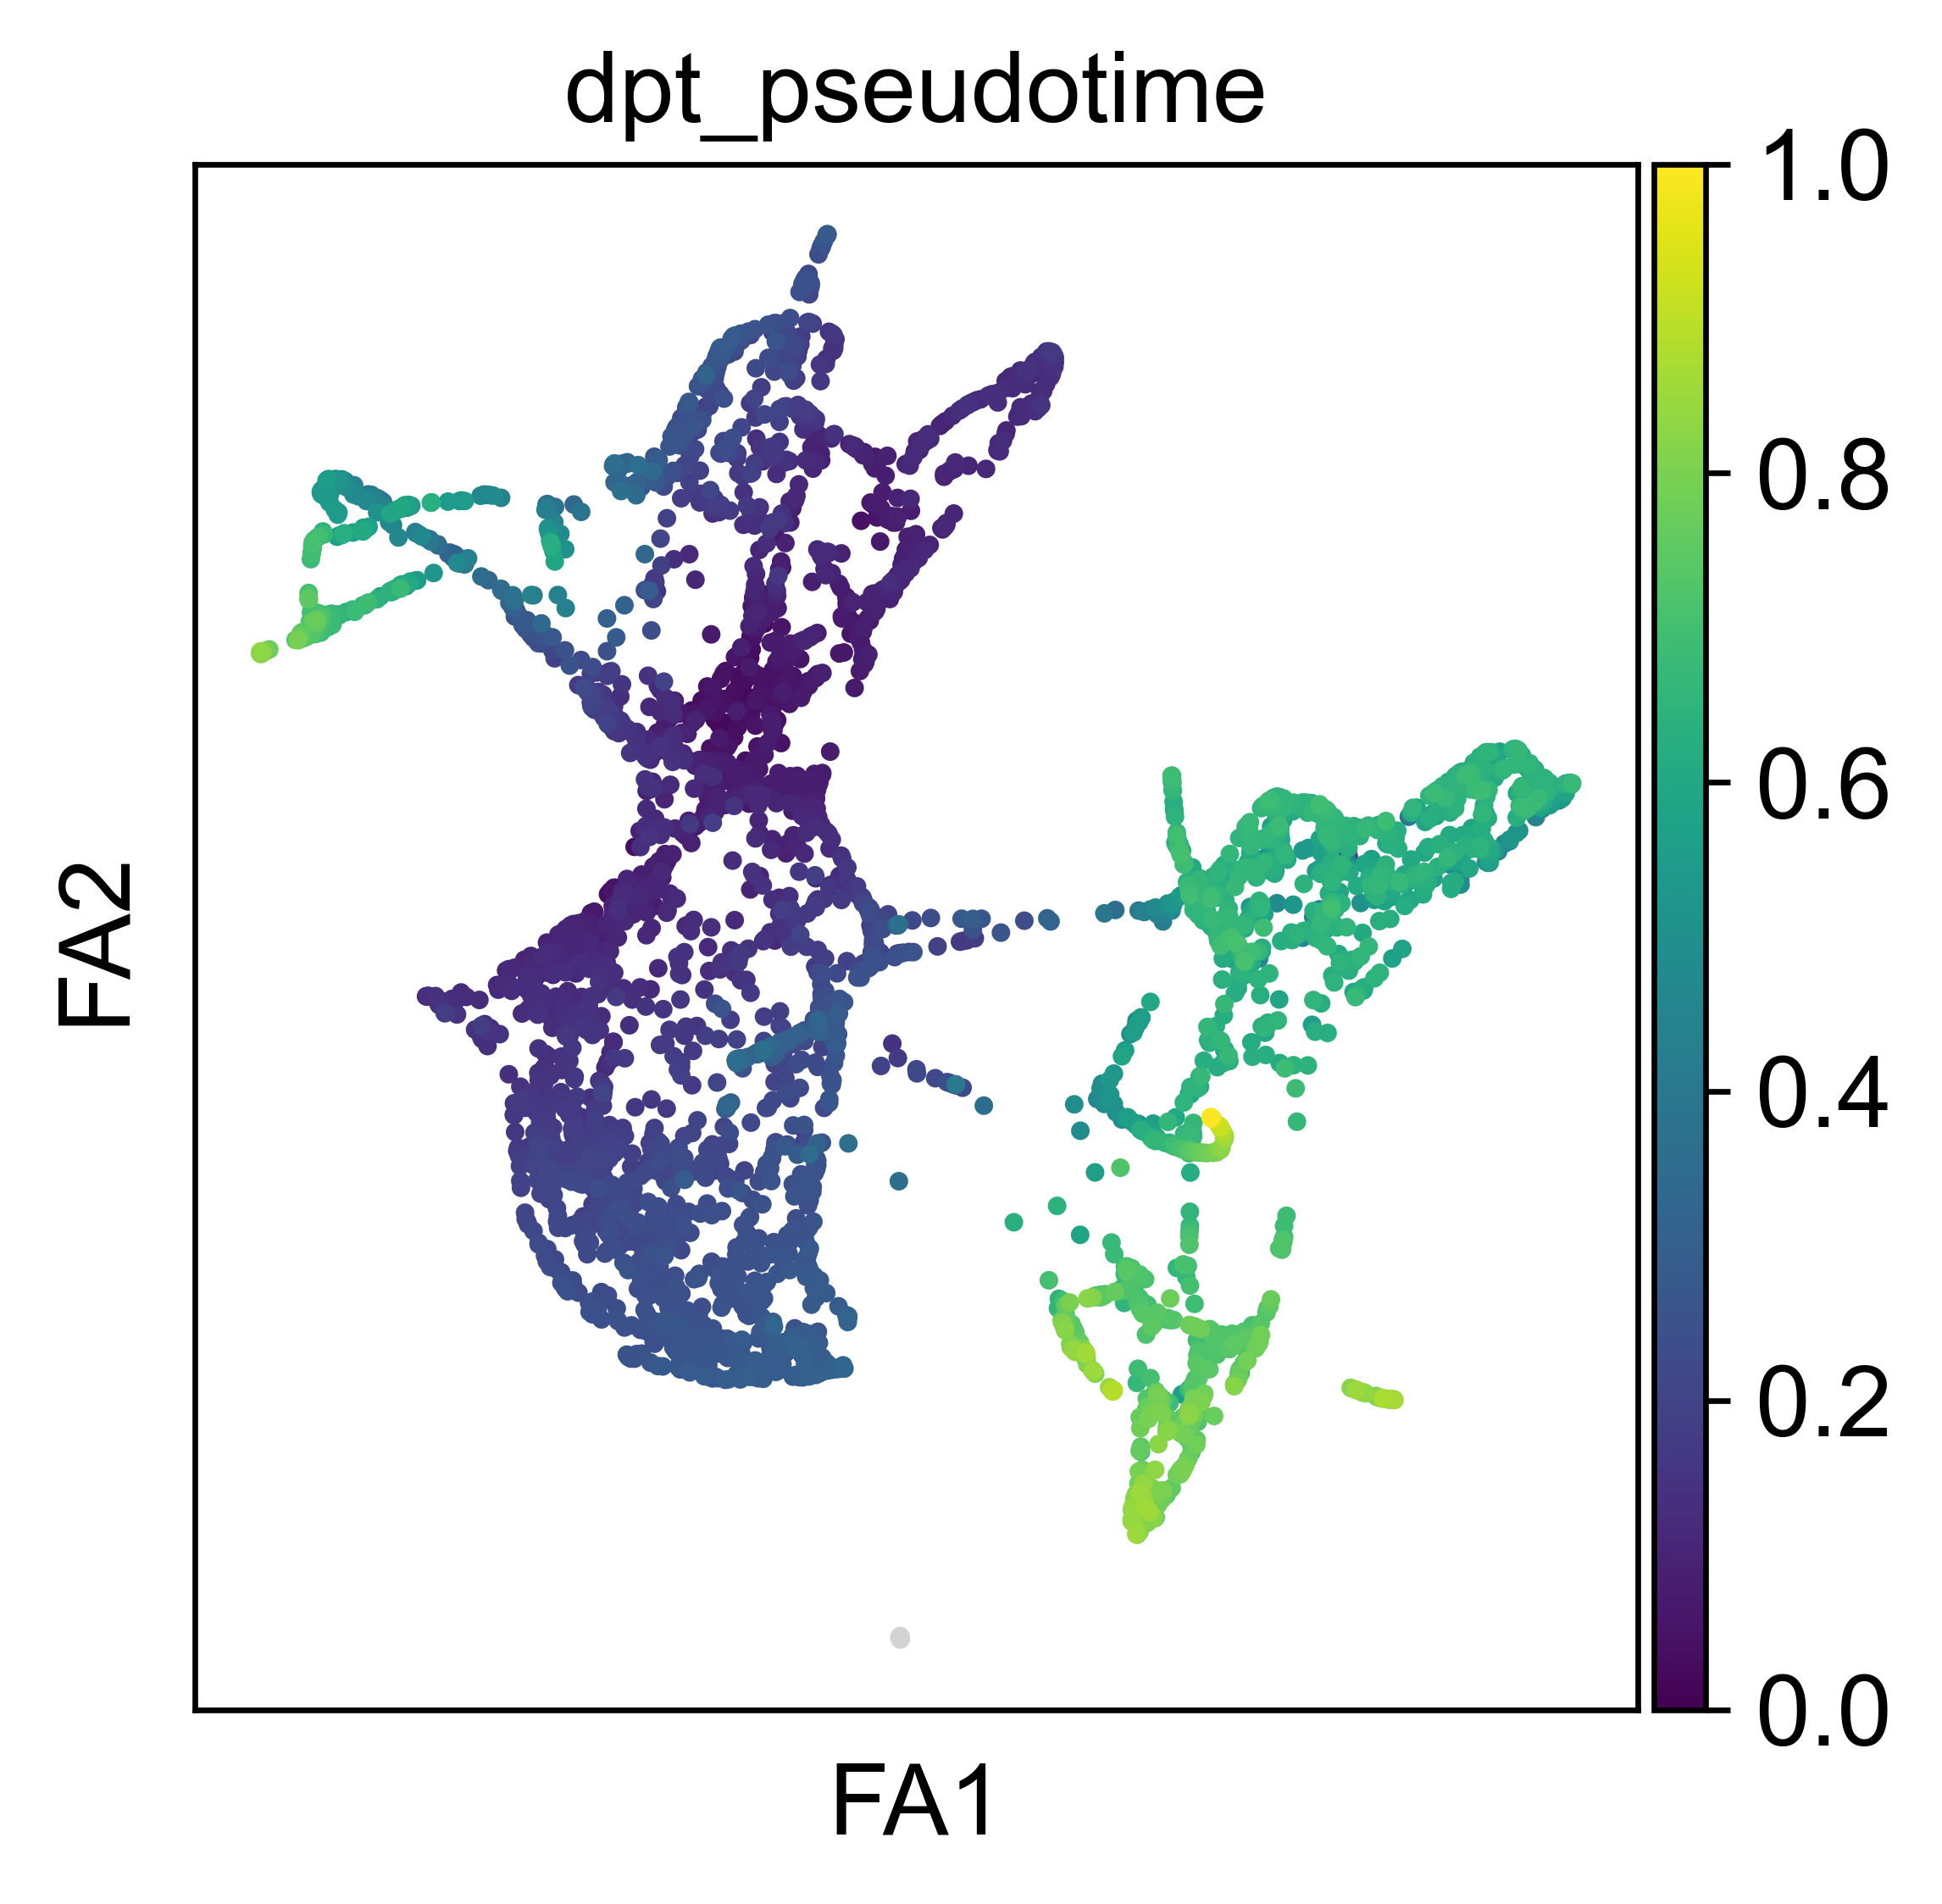

In [25]:
sc.pl.draw_graph(adata_fib, color=['dpt_pseudotime'])

In [32]:
sc.tl.rank_genes_groups(adata_fib, 'newleiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


In [33]:
pd.DataFrame(adata_fib.uns['rank_genes_groups']['names']).head(30)

,0,1,2,3,4
0,KRT14,SPRY1,CPE,CXCL8,GAPDH
1,TMSB4X,COL18A1,C12orf75,MT2A,RPS19
2,IGFBP7,TMEM176B,COL6A2,FTH1,RPS14
3,MT-CYB,IGFBP2,RPS10,MT1E,RPS18
4,MMP2,RPL37,DNAJB1,IL24,RPL13
5,KRT16,RPS29,CYR61,IL32,RPL28
6,KRT6A,IFITM1,CACNA2D3,NAMPT,RPL18
7,TIMP2,RPS28,HSPA1B,PDLIM4,RPL18A
8,MT-CO3,PTGDS,RND3,EIF5A,RPS15
9,GAS6,RPS27,EIF5A,RPS10,RPL8


In [20]:
adata_fib34=adata_fib[adata_fib.obs['newleiden'].isin(['3','4'])]

In [31]:
sc.tl.pca(adata_fib34)
sc.pp.neighbors(adata_fib34,n_neighbors=5,n_pcs=20)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [32]:
sc.tl.rank_genes_groups(adata_fib,groupby='newleiden',method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


In [33]:
up3=sc.get.rank_genes_groups_df(adata_fib,group='3',pval_cutoff=0.05,log2fc_min=1.5)

In [34]:
up4=sc.get.rank_genes_groups_df(adata_fib,group='4',pval_cutoff=0.05,log2fc_min=1.5)

In [59]:
up3.to_csv('up3fib1.csv')
up4.to_csv('up4fib1.csv')